In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import measure

## Load images

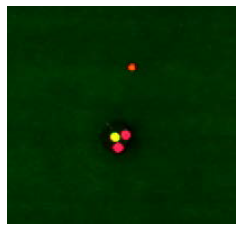

In [2]:
sample1 = cv2.imread('sample-1.png')
img1 = cv2.cvtColor(sample1, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img1);

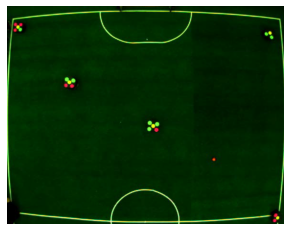

In [3]:
sample2 = cv2.imread('sample-2.png')
img2 = cv2.cvtColor(sample2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img2);

## Classify images

In [4]:
def classify_image(img):
    
    masks = []

    low_yellow = np.array([200, 220, 0])  # yellow
    high_yellow = np.array([255, 255, 110])
    masks.append(cv2.inRange(img, low_yellow, high_yellow))

    low_orange = np.array([170, 80, 0])  # orange
    high_orange = np.array([255, 120, 150])
    masks.append(cv2.inRange(img, low_orange, high_orange))

    low_pink = np.array([100, 20, 50])  # pink 
    high_pink = np.array([255, 95, 110])
    masks.append(cv2.inRange(img, low_pink, high_pink))

    low_green = np.array([0, 0, 40])  # green
    high_green = np.array([255, 255, 100])
    masks.append(cv2.inRange(img, low_green, high_green))
    
    # ----------
    
    results = []

    for m in masks:
        results.append(cv2.bitwise_and(img, img, mask=m))
        
    result = sum(results)

    plt.imshow(result);
    
    return result

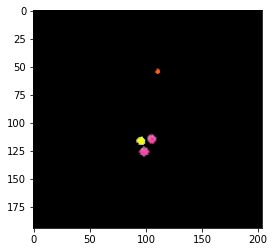

In [5]:
classified1 = classify_image(img1)

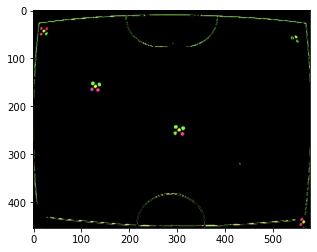

In [6]:
classified2 = classify_image(img2)

## Bounding Box and Location of each object

In [7]:
def ssl_detect(img):
    
    classified_img = classify_image(img)
    
    # ref to: https://www.appsloveworld.com/opencv/100/49/how-to-merge-multiple-bounding-box-into-one-in-python-opencv
    img_gray = cv2.cvtColor(classified_img, cv2.COLOR_BGR2GRAY)
    if np.array_equal(img, img1):
        ret, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY)
    elif np.array_equal(img, img2):
        ret, thresh = cv2.threshold(img_gray, 140, 255, cv2.THRESH_BINARY)
    thresh = cv2.erode(thresh, None, iterations=1)
    thresh = cv2.dilate(thresh, None, iterations=6)
    labels = measure.label(thresh, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    for label in np.unique(labels):
        if label == 0:
            continue
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        if numPixels > 30:
            mask = cv2.add(mask, labelMask)

    contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    center_coordinates = []
    # Draw a bounding box around all detected contours
    for c in contours:
        # Make sure contour area is large enough
        if (cv2.contourArea(c)) > 100:
            x, y, w, h = cv2.boundingRect(c)
            rect = cv2.rectangle(classified_img, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
            center_coordinates.append((x+w/2, y+h/2))
            
            cropped_image = classified_img[y+2:y+h-2, x+2:x+w-2]
            cropped_image2 = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
            cv2.imwrite('contour'+str(x)+'.png', cropped_image2)

    plt.imshow(classified_img);
    print('center coordinates:', center_coordinates)

center coordinates: [(101.0, 120.5), (111.5, 54.5)]


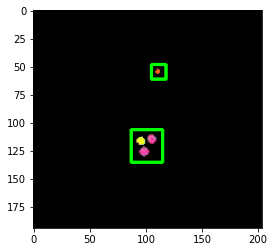

In [8]:
ssl_detect(img1)

center coordinates: [(564.5, 441.5), (305.5, 250.0), (131.5, 155.5), (549.5, 56.0), (25.0, 46.5)]


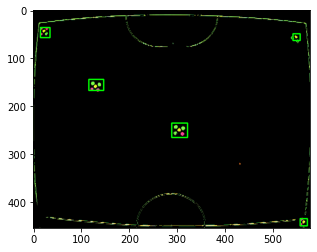

In [9]:
ssl_detect(img2)

## ID of each robot

In [31]:
def find_robot_id(img):
    
    masks = []

    low_yellow = np.array([200, 220, 0])  # yellow
    high_yellow = np.array([255, 255, 110])
    masks.append(cv2.inRange(img, low_yellow, high_yellow))

    low_orange = np.array([180, 95, 10])  # orange
    high_orange = np.array([255, 100, 150])
    masks.append(cv2.inRange(img, low_orange, high_orange))

    low_pink = np.array([100, 140, 55])  # pink 
    high_pink = np.array([220, 200, 70])
    masks.append(cv2.inRange(img, low_pink, high_pink))

    low_green = np.array([80, 180, 0])  # green
    high_green = np.array([87, 255, 80])
    masks.append(cv2.inRange(img, low_green, high_green))
    
    print('Number of yellow, orange, pink, and green in order:')
    nums = []
    for m in masks:
        contours, h = cv2.findContours(m.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        print(len(contours))
        nums.append(len(contours))
        
    if nums[2] == 2 and nums[3] == 0:
        print('ID: 0')
        
    elif nums[2] == 3 and nums[3] == 1:
        print('ID: 1')
        
    elif nums[2] == 2 and nums[3] == 2:
        print('ID: 2')
        
    elif nums[2] == 0 and nums[3] == 2:
        print('ID: 3')
        
    elif nums[2] == 1 and nums[3] == 3:
        print('ID: 4')
        
    else:
        print('ID: Unknown')

Number of yellow, orange, pink, and green in order:
1
0
2
0
ID: 0


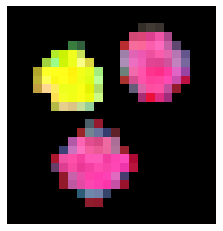

In [32]:
cont1 = cv2.imread('contour87.png')
img1_bot = cv2.cvtColor(cont1, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img1_bot);

find_robot_id(img1_bot)

Number of yellow, orange, pink, and green in order:
1
0
2
2
ID: 2


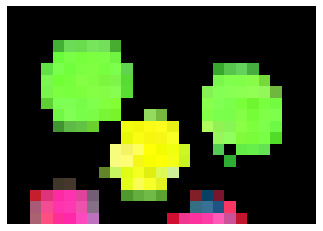

In [33]:
cont2 = cv2.imread('contour116.png')
img2_bot1 = cv2.cvtColor(cont2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img2_bot1);

find_robot_id(img2_bot1)

Number of yellow, orange, pink, and green in order:
1
0
1
3
ID: 4


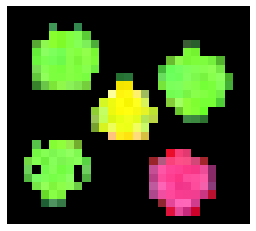

In [34]:
cont3 = cv2.imread('contour289.png')
img2_bot2 = cv2.cvtColor(cont3, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img2_bot2);

find_robot_id(img2_bot2)

Number of yellow, orange, pink, and green in order:
1
0
1
0
ID: Unknown


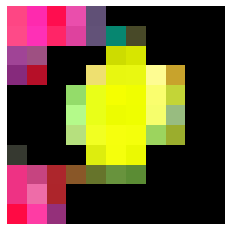

In [35]:
cont4 = cv2.imread('contour557.png')
img2_bot3 = cv2.cvtColor(cont4, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img2_bot3);

find_robot_id(img2_bot3)

Number of yellow, orange, pink, and green in order:
1
0
0
1
ID: Unknown


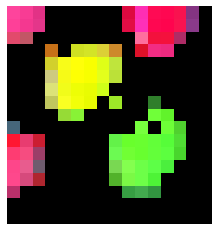

In [36]:
cont5 = cv2.imread('contour15.png')
img2_bot4 = cv2.cvtColor(cont5, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img2_bot4);

find_robot_id(img2_bot4)

Number of yellow, orange, pink, and green in order:
1
0
2
0
ID: 0


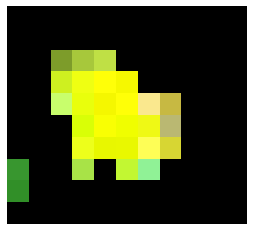

In [37]:
cont6 = cv2.imread('contour542.png')
img2_bot5 = cv2.cvtColor(cont6, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img2_bot5);

find_robot_id(img2_bot5)